# Chapter 5. Hierarchical Models

## 5.3 Bayesian analysis of conjugate hierarchical models

Example: Rat-tumor (p.108)

Here, we create the marginal posterior of hyper-parameters $(\alpha, \beta)$ given data.
In order to use 'non-informative' prior, we consider the uniform density on $(\frac{\alpha}{\alpha+\beta},(\alpha+\beta)^{-1/2})$ (p.110)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import loggamma
%matplotlib inline

In [2]:
experiment_data = [
    (0, 20), (0, 20), (0, 20), (0, 19), (0, 18), (0, 18), (1, 18), (1, 18), (2, 25), (2, 20),
    (1, 10), (5, 49), (3, 20), (2, 13), (9, 48), (4, 20), (10, 48), (4, 19), (6, 23), (5, 19),
    (6, 22), (4, 14), (0, 20), (0, 20), (0, 20), (0, 17), (1, 20), (1, 20), (2, 24), (2, 23),
    (2, 20), (2, 19), (5, 46), (3, 27), (10, 50), (4, 20), (4, 20), (4, 19), (4, 19), (5, 22),
    (6, 20), (6, 20), (6, 20), (0, 20), (0, 19), (1, 20), (1, 20), (2, 20), (2, 20), (2, 17),
    (7, 49), (4, 20), (4, 20), (11, 46), (12, 49), (16, 52), (15, 47), (0, 19), (0, 19),
    (1, 19), (1, 19), (2, 20), (2, 20), (7, 47), (3, 20), (4, 20), (4, 20), (5, 20), (5, 20),
    (15, 46), (9, 24)
]

In [3]:
# log of marginal hyperparam posterior
def log_marginal_hyperparam_posterior(alpha, beta):
    p = np.log(alpha + beta) * (-5/2)
    for data in experiment_data:
        p += loggamma(alpha+beta) + loggamma(alpha + data[0]) + loggamma(beta + data[1] - data[0]) - (loggamma(alpha) + loggamma(beta) + loggamma(alpha+beta+data[1]))
    return p

def solve_for_a_b(x, y):
    # Convert to exponential form
    a_over_b = np.exp(x)
    a_plus_b = np.exp(y)

    # Calculate b
    b = a_plus_b / (a_over_b + 1)

    # Calculate a
    a = b * a_over_b

    return a, b

def fixed_marginal_posterior(x,y):
    a, b = solve_for_a_b(x,y)
    return log_marginal_hyperparam_posterior(a,b)

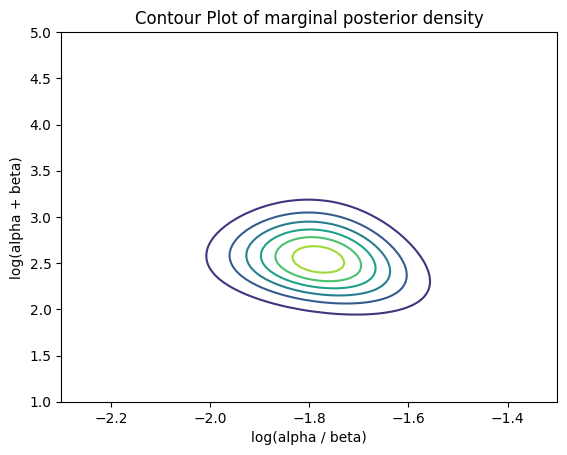

In [4]:
# compute posterior
x = np.linspace(-2.3, -1.3, 100) # log(a/b)
y = np.linspace(1,5, 100) # log(a+b)
X,Y = np.meshgrid(x,y)

f = fixed_marginal_posterior(X,Y)

# Create a contour plot
plt.contour(X, Y, np.exp(f - np.max(f)))

plt.xlabel('log(alpha / beta)')
plt.ylabel('log(alpha + beta)')
plt.title('Contour Plot of marginal posterior density')

# Show the plot
plt.show()

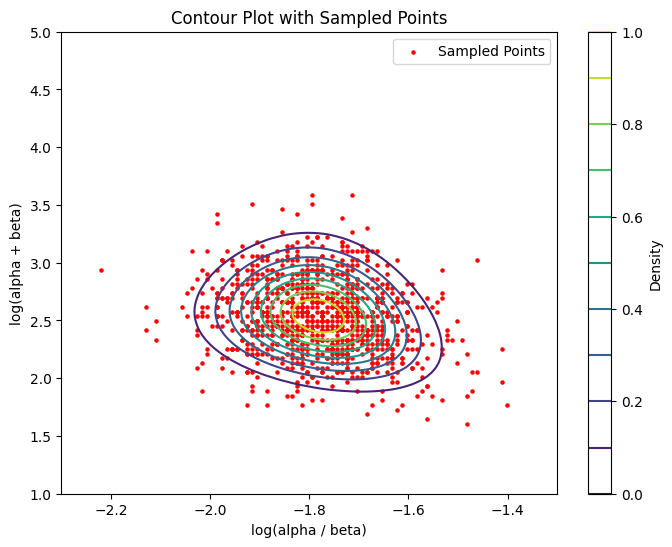

In [5]:
# create samples from the density

posterior = np.exp(f - np.max(f))
posterior = posterior / np.sum(posterior)

p_flat = posterior.flatten()
x_flat = X.flatten()
y_flat = Y.flatten()

num_samples = 1000

chosen = np.random.choice(len(p_flat), size=num_samples, p=p_flat)

sampled_x = x_flat[chosen]
sampled_y = y_flat[chosen]

# plotting

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y,  np.exp(f - np.max(f)), levels=10, cmap='viridis')
plt.scatter(sampled_x, sampled_y, color='red', s=5, label='Sampled Points')

plt.colorbar(contour, label='Density')
plt.xlabel('log(alpha / beta)')
plt.ylabel('log(alpha + beta)')
plt.title('Contour Plot with Sampled Points')
plt.legend()
plt.show()

